# Dataset Description
There are 14 columns:
-	age. The age of the patient.
-	sex. The gender of the patient. (1 = male, 0 = female).
-	cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
-	trestbps. Resting blood pressure in mmHg.
-	chol. Serum Cholestero in mg/dl.
-	fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
-	restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
-	thalach. Max heart rate achieved.
-	exang. Exercise induced angina (1 = yes, 0 = no).
-	oldpeak. ST depression induced by exercise relative to rest.
-	slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
-	ca. Number of major vessels (0–3) colored by flourosopy.
-	thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
-	Target. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).
* What to predict?
- The last attribute num is the one we are trying to predict. You are supposed to provide a probability between 0 and 1 describing how confident your model is in predicting whether or not a patient has a heart disease.



In [39]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import warnings
warnings.filterwarnings(action = 'ignore')
### Let's try out a few more models
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [5]:
df= pd.read_excel(r"C:\Users\Harshpalsingh\Desktop\heart_disease.xlsx")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Predicted Output,Predcited probability
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,NaN,NaN
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,NaN,NaN
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,NaN,NaN
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,NaN,NaN
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,NaN,NaN


In [7]:
df=df.drop(["Predicted Output","Predcited probability"],axis=1)

In [8]:
#Making Copy for the baseline Model
base_df=df.copy()

<AxesSubplot:>

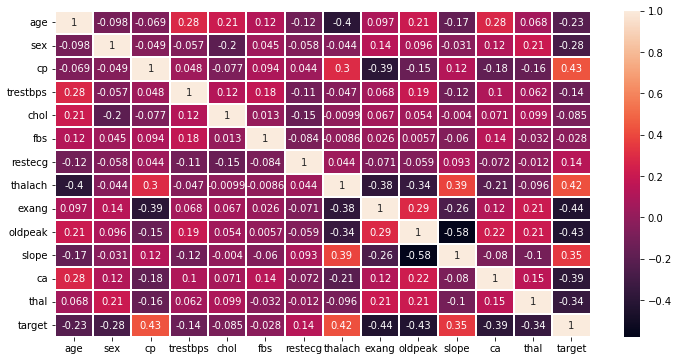

In [9]:
#Checking Corr.
plt.figure(figsize=(12, 6))

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2,annot=True)


<AxesSubplot:xlabel='slope', ylabel='oldpeak'>

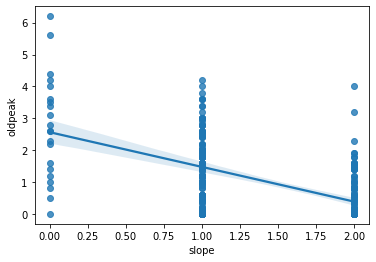

In [10]:
sns.regplot(x='slope',y='oldpeak',data=df)

#### * Slope and oldpeak are slighty negatively correlated 

<AxesSubplot:xlabel='chol', ylabel='Density'>

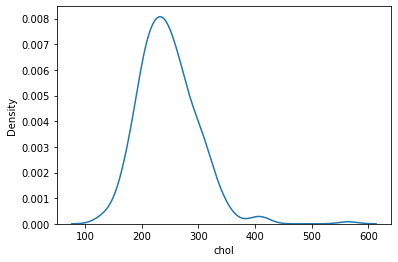

In [11]:
# Chol is right skewed and has outlier
sns.kdeplot(x='chol',data=df)

# EDA Insights
-	chol column has an outlier 


In [12]:
# # Removing Outlier
# Q1 = df['chol'].quantile(0.25)
# Q3 = df['chol'].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df['chol'] < (Q1 - 1.5 * IQR)) |(df['chol'] > (Q3 + 1.5 * IQR)))]

In [13]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
#TypeCasting the Numerical columns to category
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['slope'] = df['slope'].astype('category')
df['exang'] = df['exang'].astype('category')
df['ca'] = df['ca'].astype('category')
df['target'] = df['target'].astype('category')
df['thal'] = df['thal'].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


In [17]:
# Segregate data based on numeric and categorical variable
num_cols=df.select_dtypes(include=['int64','float64','Int64'])
cat_cols=df.select_dtypes(exclude=['int64','float64','Int64'])

## Univariate Analysis 

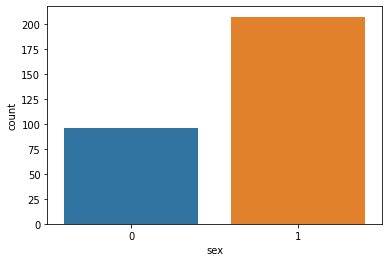

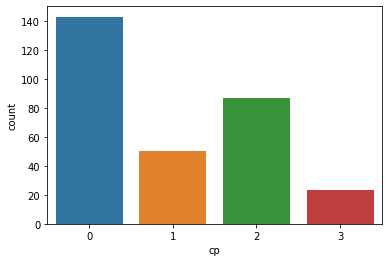

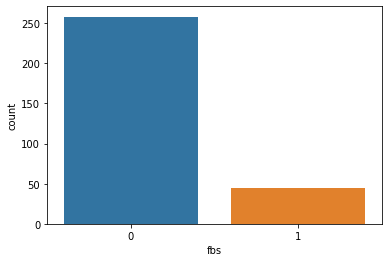

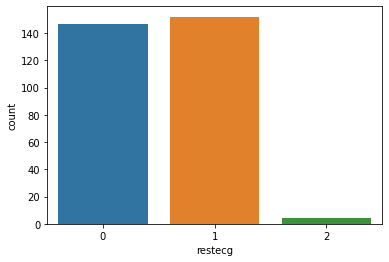

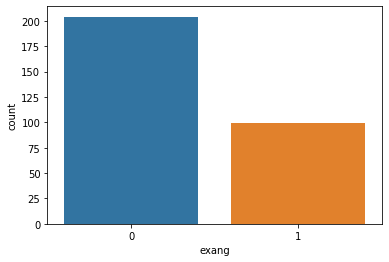

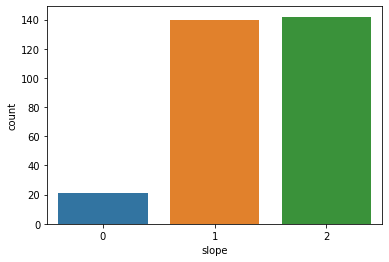

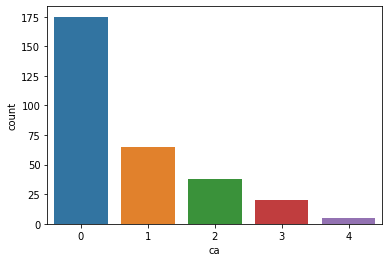

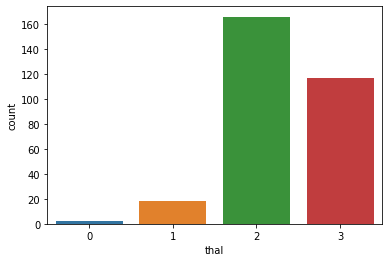

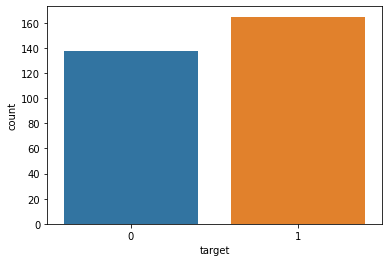

In [18]:
for i in cat_cols:
    sns.countplot(df[i], )
    plt.show()

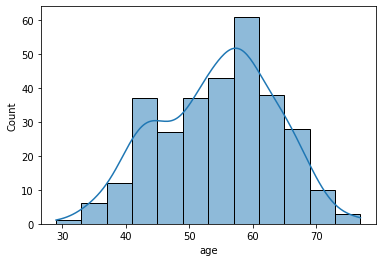

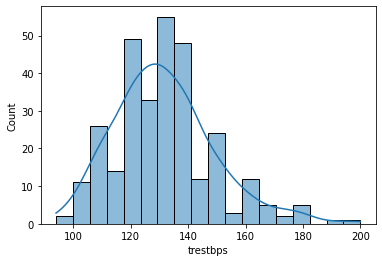

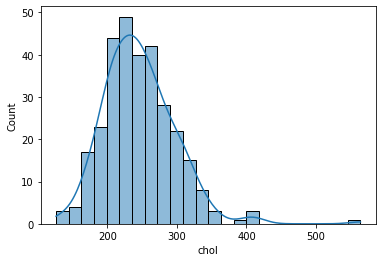

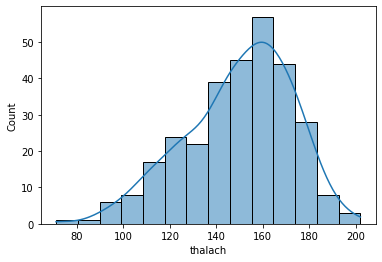

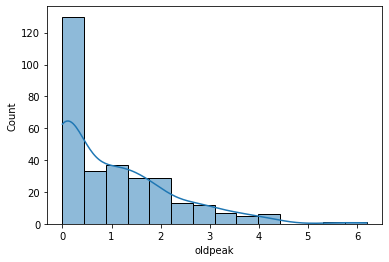

In [19]:
for i in num_cols:
    sns.histplot(df[i], kde=True)
    plt.show()

### List of Hypothesis and investigation .

1.  Is oldpeak(ST depression) less likely to presense of heart disease ?
2.  Is Chest pain causing the presence of heart disease?
3.  Is thalach(Max heart rate) causing the presence of heart disease ?
4.  Is Slope increasing thalach(max heart rate)?
5.  Is age factor of increasing thalach(max heart rate) ?
6.  Is male are more likely to presence of heart disease?


<AxesSubplot:xlabel='sex'>

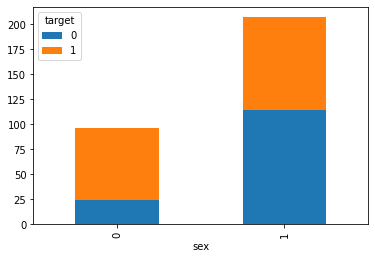

In [20]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='cp'>

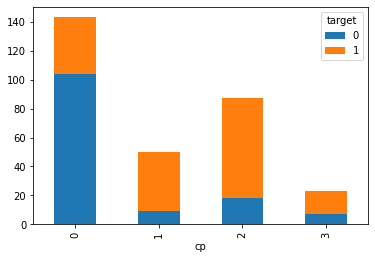

In [21]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='thal'>

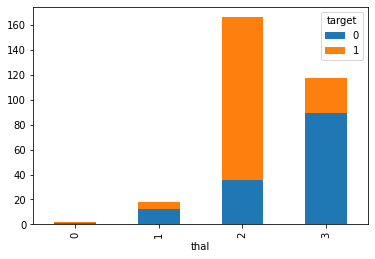

In [22]:
pd.crosstab(df['thal'], df['target']).plot(kind='bar', stacked=True)


- chest pain has 140 value of 0 which is not mentioned in the range 1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic) 
** As per our assumption it's true that chest pain is one of the major reason of heart disease presense

In [23]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


#####  -  Females are more likely to have presence of heart diseases

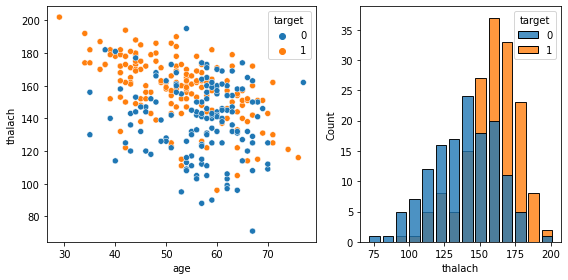

In [24]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df, x="age", y="thalach", hue="target", ax=axs[0])
sns.histplot(data=df, x="thalach", hue="target", shrink=.8, alpha=.8, legend=True, ax=axs[1])
f.tight_layout()

#### We can clearly see through scatter plot that their is negative correlaction between age and thalach(max heart rate)
-  people with heart disease presense have high thalach(max heart rate).

In [25]:
round(df['target'].value_counts(normalize=True),2)*100

1    54.0
0    46.0
Name: target, dtype: float64

#####  Presence of heart disease >>  Absense of heart disease  

In [26]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [27]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [28]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

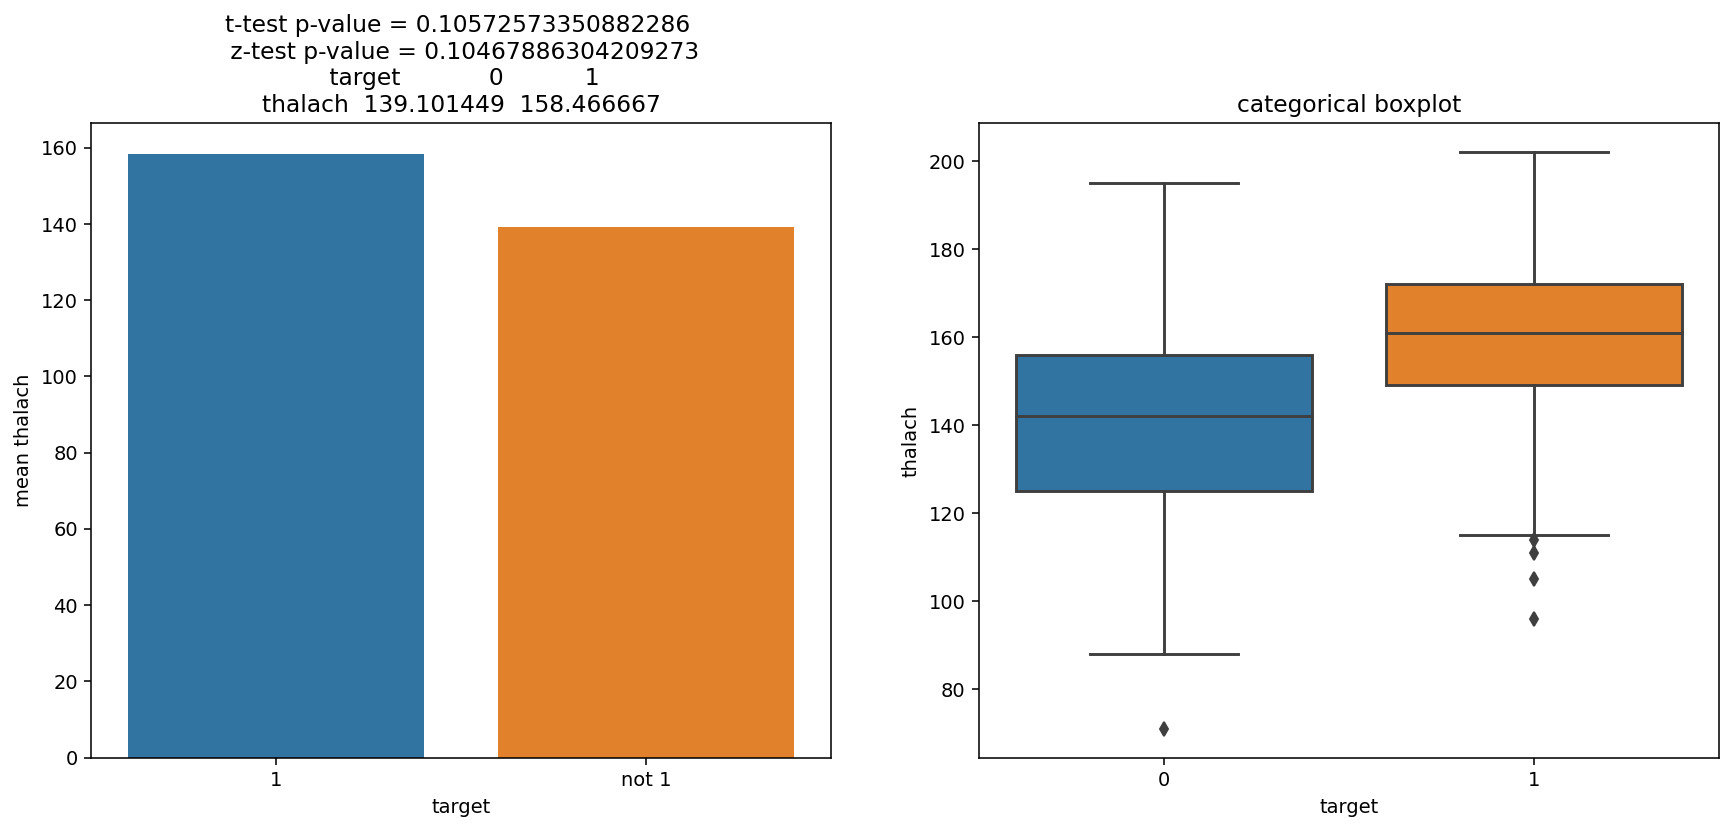

In [29]:
Bivariate_cont_cat(df, 'thalach', 'target',1)

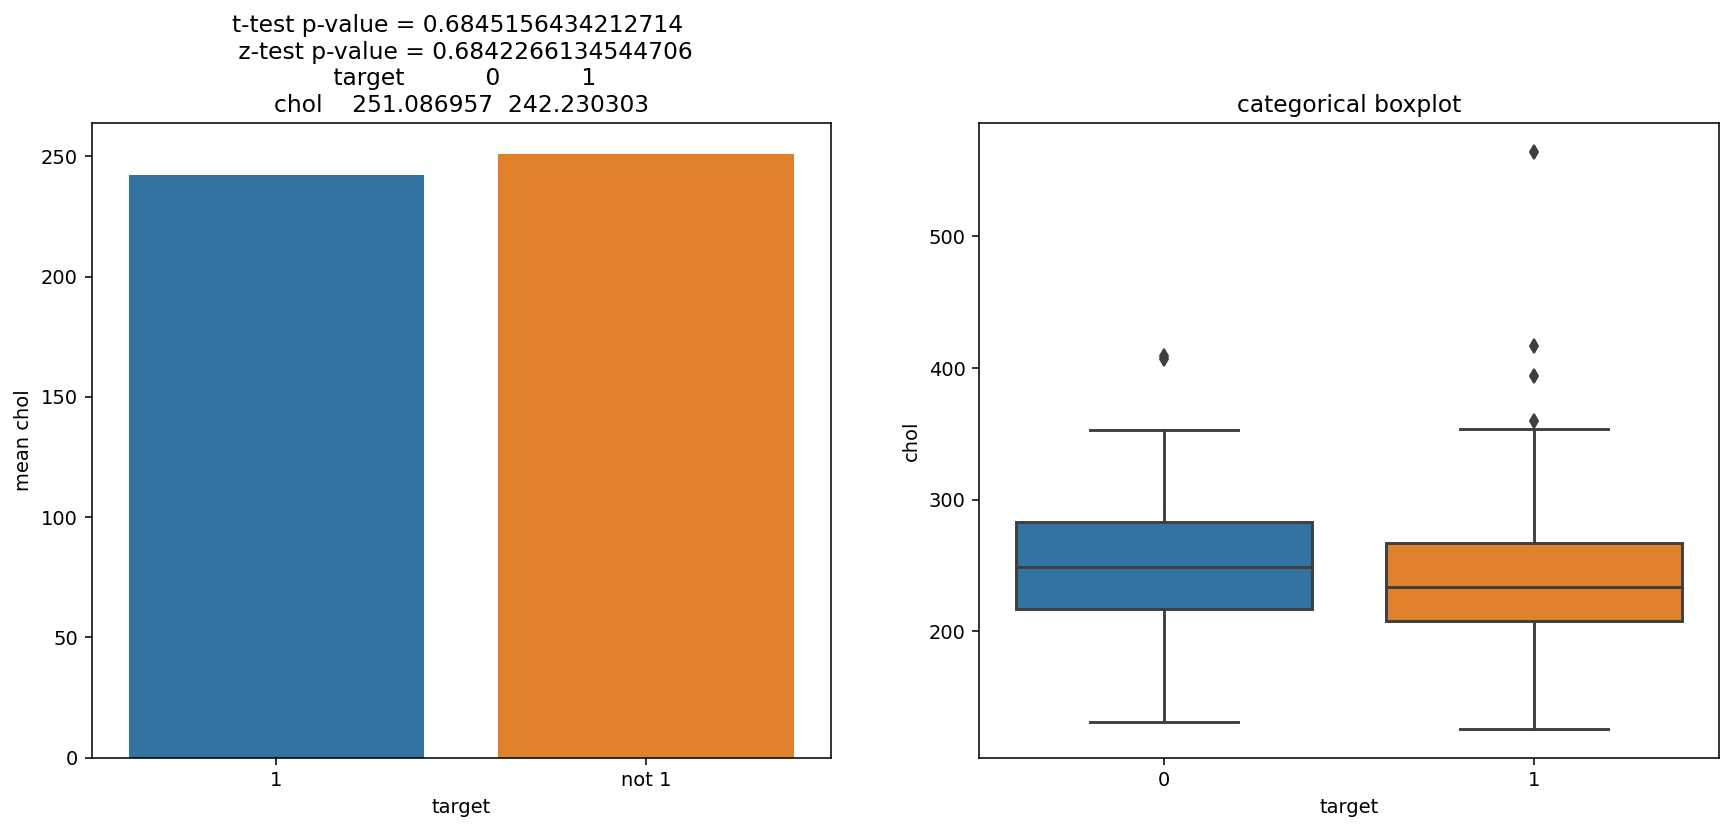

In [30]:
Bivariate_cont_cat(df, 'chol', 'target',1)

 -  people with heart disease presense have high thalach(max heart rate).

### Data Pre-processing 

### Base Line Model Without Scaling  

In [31]:
base_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
x=base_df.drop('target',axis=1)
y=base_df.target

In [230]:
base_df['target'].value_counts(normalize= True)*100

1    54.455446
0    45.544554
Name: target, dtype: float64

In [33]:
#Train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify = y,random_state=1)

In [36]:
models = []
models.append(('LR', LogisticRegression(class_weight='balanced', random_state=42)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(kernel='linear', random_state=42)))
models.append(('XGBoost', XGBClassifier(n_estimators = 100, n_jobs = -1, learning_rate = 0.1, max_depth =5, scale_pos_weight = 16)))
models # we have created a list of models which will be tried!!

[('LR', LogisticRegression(class_weight='balanced', random_state=42)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier(random_state=42)),
 ('NB', GaussianNB()),
 ('RF', RandomForestClassifier()),
 ('SVM', SVC(kernel='linear', random_state=42)),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs

In [40]:
# Traning all the 6 models & testing them ONCE !!!
train_scores = []
test_scores = []
names = []
for name, model in models:
    model.fit(x_train, y_train)
    names.append(name)
#     test_scores.append(model.score(X_test, y_test) )
#     train_scores.append(model.score(X_train, y_train) )
    print(name, ':', model.score(x_train, y_train).round(4), '\t', \
          model.score(x_test, y_test).round(4) )

LR : 0.8811 	 0.8553
LDA : 0.8458 	 0.8421
KNN : 0.7313 	 0.6447
CART : 1.0 	 0.7237
NB : 0.8546 	 0.8026
RF : 1.0 	 0.8421
SVM : 0.8502 	 0.8289
XGBoost : 1.0 	 0.8289


In [233]:
#%% evaluate each model in turn for basline model
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []
names = []
n_splits = 10
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='f1',error_score='raise')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %5.2f (%5.2f)" % (name, cv_results.mean()*100, \
                           cv_results.std()*100)
    print(msg)
    
results_df_base = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5 CV6 CV7 CV8 CV9 CV10'.split())
results_df_base['CV Mean_base'] = results_df_base.iloc[:,0:n_splits].mean(axis=1)
results_df_base['CV Std Dev_base'] = results_df_base.iloc[:,0:n_splits].std(axis=1)
results_df_base.sort_values(by='CV Mean_base', ascending=False)*100    

LR: 85.86 ( 6.65)
LDA: 85.99 ( 5.24)
KNN: 67.13 ( 5.60)
CART: 78.80 ( 3.72)
NB: 82.46 ( 6.54)
RF: 83.43 ( 6.53)
SVM: 85.74 ( 5.94)
XGBoost: 83.65 ( 4.54)


,CV1,CV2,CV3,CV4,CV5,CV6,CV7,CV8,CV9,CV10,CV Mean_base,CV Std Dev_base
LDA,91.891892,82.352941,85.714286,81.081081,86.486486,84.210526,94.117647,87.500000,75.675676,90.909091,85.993963,5.523368
LR,94.444444,81.250000,82.352941,83.333333,88.888889,86.486486,94.117647,89.655172,70.588235,87.500000,85.861715,7.005580
SVM,94.444444,82.352941,85.714286,81.081081,88.888889,84.210526,94.117647,80.000000,75.675676,90.909091,85.739458,6.256936
XGBoost,91.891892,81.081081,83.333333,82.051282,81.081081,86.486486,85.714286,82.352941,74.285714,88.235294,83.651339,4.789893
RF,97.142857,76.470588,82.352941,81.081081,80.000000,86.486486,90.322581,83.870968,72.727273,83.870968,83.432574,6.885615
NB,88.888889,73.333333,78.787879,77.777778,88.888889,83.333333,87.500000,84.848485,70.967742,90.322581,82.464891,6.889009
CART,82.352941,78.787879,82.352941,74.285714,72.222222,82.352941,76.470588,78.787879,76.470588,83.870968,78.795466,3.916961
KNN,60.606061,62.500000,66.666667,72.222222,66.666667,75.000000,62.500000,62.500000,64.864865,77.777778,67.130426,5.903629


#### We can see high std_dev in our models so it will be a question later on model reliability

### Feature Scaling and Data Transfomation

In [41]:
num_trans_col= ['trestbps', 'chol', 'thalach']

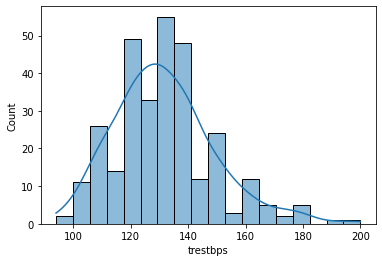

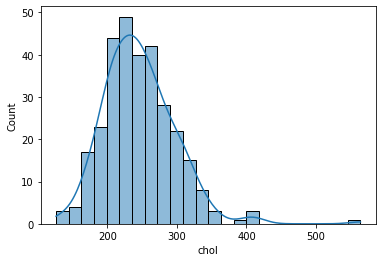

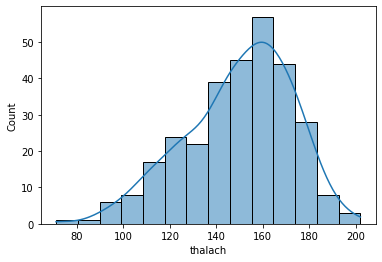

In [42]:
#Log Transformation to reduce skewness 
for i in num_trans_col:
    sns.histplot(df[i], kde=True)
    plt.show()
    

In [43]:
df['log_oldpeak']=np.log(df['oldpeak']+1)

In [44]:
import scipy.stats as stats
df['oldpeak_boxcox'], param = stats.boxcox(df.oldpeak+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)



Optimal lambda:  -0.5024659604311568


Text(0.5, 0.98, 'Distribution of the data Log vs Box-Cox')

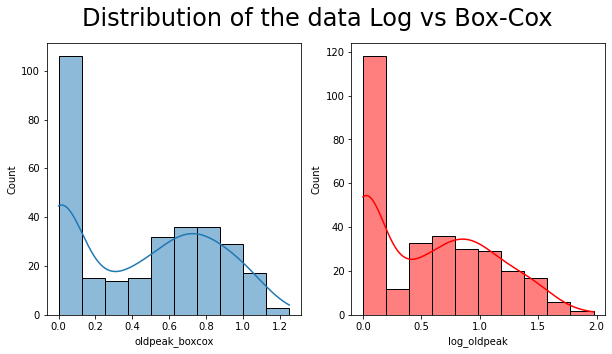

In [45]:
fig1, ax = plt.subplots(1,2, figsize=(10,5)) # 1 row, 2 columns
#hist
sns.histplot(df['oldpeak_boxcox'], ax=ax[0],kde=True)
#hist
ax[1]=sns.histplot(df['log_oldpeak'],kde=True,color='Red')
fig1.suptitle('Distribution of the data Log vs Box-Cox', fontsize=24)

In [46]:
df=df.drop("log_oldpeak",axis=1)

- We will take the box-cox transformation and drop Log transformatio because its giving better normal distribution 

#### We have pretty much changed the skewness from the data by log transformation

In [47]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].plot.kde()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

    

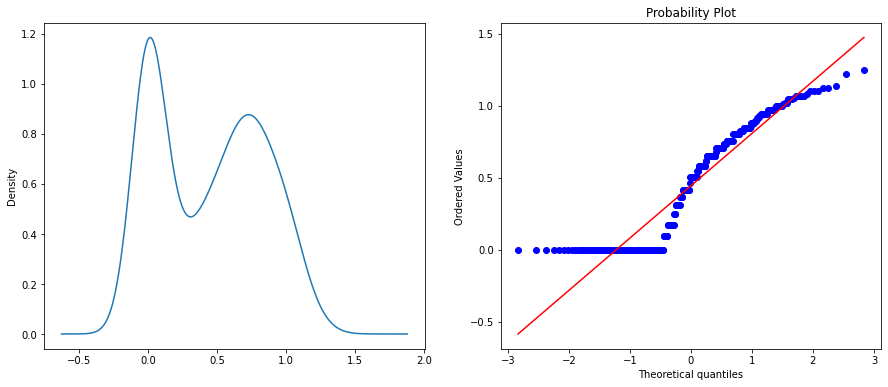

In [48]:
diagnostic_plots(df,'oldpeak_boxcox')

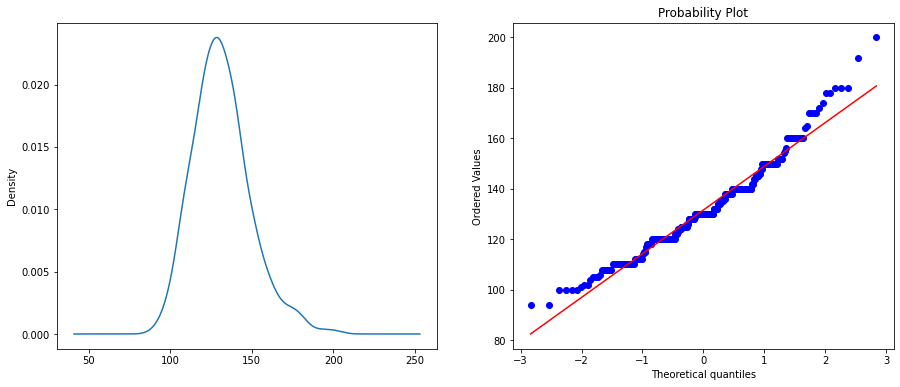

In [49]:
diagnostic_plots(df,'trestbps')

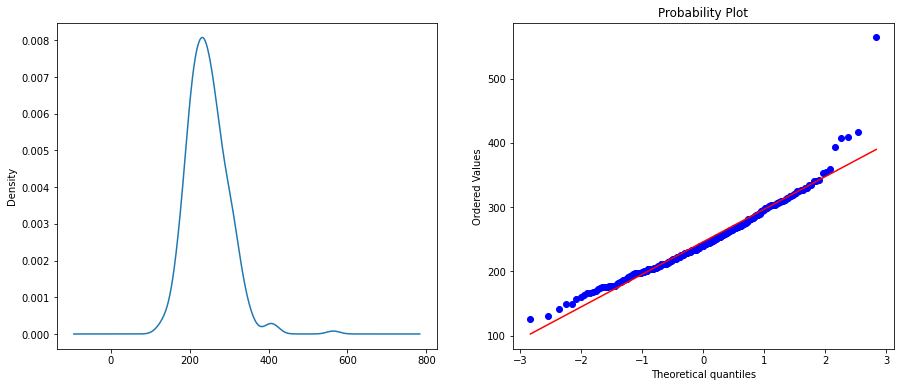

In [50]:
diagnostic_plots(df,'chol')

### Feature Scaling

In [71]:
df=df.drop("oldpeak",axis=1)

KeyError: "['oldpeak'] not found in axis"

In [72]:
#TypeCasting the Category colums to Numerical back for Model Buidling to category
df['sex'] = df['sex'].astype('int64')
df['cp'] = df['cp'].astype('int64')
df['fbs'] = df['fbs'].astype('int64')
df['restecg'] = df['restecg'].astype('int64')
df['slope'] = df['slope'].astype('int64')
df['exang'] = df['exang'].astype('int64')
df['ca'] = df['ca'].astype('int64')
df['target'] = df['target'].astype('int64')
df['thal'] = df['thal'].astype('int64')

In [73]:
X=df.drop('target',axis=1)
Y=df.target

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,stratify = Y,random_state=1)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scalar=StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test= scalar.transform(X_test)

In [77]:
(X_train.shape),(X_test.shape),(Y_train.shape),(Y_test.shape)

((227, 13), (76, 13), (227,), (76,))

### Model Building 

In [78]:
# Traning all the 6 models & testing them ONCE !!!
train_scores = []
test_scores = []
names = []
for name, model in models:
    model.fit(X_train, Y_train)
    names.append(name)
#     test_scores.append(model.score(X_test, y_test) )
#     train_scores.append(model.score(X_train, y_train) )
    print(name, ':', model.score(X_train, Y_train).round(4), '\t', \
          model.score(X_test, Y_test).round(4) )

LR : 0.8546 	 0.8289
LDA : 0.8502 	 0.8421
KNN : 0.8811 	 0.8026
CART : 1.0 	 0.6974
NB : 0.8546 	 0.8026
RF : 1.0 	 0.8289
SVM : 0.8414 	 0.8421
XGBoost : 1.0 	 0.8289


In [234]:
#%% evaluate each model in turn
from sklearn.model_selection import StratifiedKFold, cross_val_score
results = []
names = []
n_splits = 10
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='f1',error_score='raise')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %5.2f (%5.2f)" % (name, cv_results.mean()*100, \
                           cv_results.std()*100)
    print(msg)
    
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5 CV6 CV7 CV8 CV9 CV10'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100    

LR: 83.85 ( 6.37)
LDA: 84.64 ( 5.91)
KNN: 67.32 ( 5.41)
CART: 78.47 ( 4.73)
NB: 82.85 ( 6.56)
RF: 83.00 ( 6.62)
SVM: 85.64 ( 5.59)
XGBoost: 83.65 ( 4.54)


,CV1,CV2,CV3,CV4,CV5,CV6,CV7,CV8,CV9,CV10,CV Mean,CV Std Dev
SVM,91.891892,78.787879,85.714286,81.081081,86.486486,84.210526,94.117647,87.500000,75.675676,90.909091,85.637456,5.887539
LDA,91.891892,78.787879,82.352941,81.081081,86.486486,84.210526,90.909091,87.500000,72.222222,90.909091,84.635121,6.229957
LR,91.428571,75.000000,82.352941,82.352941,86.486486,88.888889,90.909091,86.666667,70.588235,83.870968,83.854479,6.718301
XGBoost,91.891892,81.081081,83.333333,82.051282,81.081081,86.486486,85.714286,82.352941,74.285714,88.235294,83.651339,4.789893
RF,94.117647,77.419355,85.714286,83.333333,74.285714,86.486486,83.870968,86.666667,70.588235,87.500000,82.998269,6.982704
NB,85.714286,73.333333,83.870968,85.714286,83.333333,84.210526,90.909091,82.352941,68.750000,90.322581,82.851134,6.911727
CART,85.714286,75.000000,78.787879,80.000000,72.222222,82.352941,72.727273,81.250000,72.727273,83.870968,78.465284,4.988107
KNN,62.500000,62.500000,66.666667,72.222222,66.666667,75.000000,62.500000,62.500000,64.864865,77.777778,67.319820,5.697858


### Reverse Feature Elimination or Backward Selection
We have already built a model using all the features and a separate model using some baseline features. We can try using backward feature elimination to check if we can do better. Let's do that next.

In [87]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(df,Y)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [88]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = df.columns
ranking_df['Rank'] = rfe.ranking_

In [89]:
ranked = ranking_df.sort_values(by=['Rank'])

In [90]:
ranked['Feature_name'][:10].values

array(['target', 'oldpeak_boxcox', 'exang', 'sex', 'thal', 'cp', 'slope',
       'ca', 'restecg', 'age'], dtype=object)

In [91]:
ranked

,Feature_name,Rank
12,target,1
13,oldpeak_boxcox,2
8,exang,3
1,sex,4
11,thal,5
2,cp,6
9,slope,7
10,ca,8
6,restecg,9
0,age,10


### Now we will build Model on Top 10 Features 

In [92]:
top10 = df[['target', 'oldpeak_boxcox', 'exang', 'sex', 'thal', 'cp', 'slope',
       'ca', 'restecg', 'thalach']].copy()

In [93]:
X_10=top10.drop('target',axis=1)
Y_10=top10.target

In [94]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_10,Y_10,test_size=0.25,stratify = Y_10,random_state=10)

In [95]:
scalar=StandardScaler()
Xtrain = scalar.fit_transform(Xtrain)
Xtest= scalar.transform(Xtest)

In [96]:
# Traning all the 6 models & testing them ONCE on TOP 10 Features !!!
train_scores = []
test_scores = []
names = []
for name, model in models:
    model.fit(Xtrain, Ytrain)
    names.append(name)
#     test_scores.append(model.score(X_test, y_test) )
#     train_scores.append(model.score(X_train, y_train) )
    print(name, ':', model.score(Xtrain, Ytrain).round(4), '\t', \
          model.score(Xtest, Ytest).round(4) )

LR : 0.8414 	 0.8158
LDA : 0.837 	 0.8684
KNN : 0.8678 	 0.8026
CART : 1.0 	 0.8158
NB : 0.8326 	 0.8026
RF : 1.0 	 0.8421
SVM : 0.8458 	 0.8421
XGBoost : 0.9692 	 0.8553


In [235]:
#%% evaluate each model in turn for TOP 10 Features
results = []
names = []
n_splits = 10
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_10, Y_10, cv=kfold, scoring='f1',error_score='raise')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %5.2f (%5.2f)" % (name, cv_results.mean()*100, \
                           cv_results.std()*100)
    print(msg)
    
results_df_10 = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5 CV6 CV7 CV8 CV9 CV10'.split())
results_df_10['CV Mean_10'] = results_df_10.iloc[:,0:n_splits].mean(axis=1)
results_df_10['CV Std Dev_10'] = results_df_10.iloc[:,0:n_splits].std(axis=1)
results_df_10.sort_values(by='CV Mean_10', ascending=False)*100    

LR: 83.95 ( 6.33)
LDA: 85.76 ( 4.63)
KNN: 78.94 ( 4.43)
CART: 79.07 ( 7.01)
NB: 84.17 ( 6.46)
RF: 84.52 ( 3.18)
SVM: 85.80 ( 5.39)
XGBoost: 84.36 ( 3.77)


,CV1,CV2,CV3,CV4,CV5,CV6,CV7,CV8,CV9,CV10,CV Mean_10,CV Std Dev_10
SVM,94.444444,78.787879,85.714286,83.333333,86.486486,84.210526,90.909091,87.500000,75.675676,90.909091,85.797081,5.682167
LDA,91.891892,82.352941,85.714286,83.333333,86.486486,86.486486,90.909091,83.870968,75.675676,90.909091,85.763025,4.881288
RF,91.428571,81.250000,82.352941,83.333333,85.714286,86.486486,81.250000,84.848485,81.081081,87.500000,84.524518,3.355363
XGBoost,89.473684,86.486486,82.352941,78.947368,84.210526,84.210526,85.714286,82.352941,78.947368,90.909091,84.360522,3.973395
NB,88.888889,75.000000,81.250000,76.470588,86.486486,86.486486,90.909091,87.500000,75.000000,93.750000,84.174154,6.809028
LR,91.428571,77.419355,77.419355,80.000000,86.486486,86.486486,90.909091,89.655172,72.222222,87.500000,83.952674,6.673487
CART,91.428571,75.000000,72.727273,82.352941,66.666667,81.250000,77.419355,84.848485,85.714286,73.333333,79.074091,7.394242
KNN,88.888889,72.727273,77.777778,76.470588,75.675676,80.000000,81.250000,80.000000,74.285714,82.352941,78.942886,4.673527


In [236]:
results = pd.DataFrame({'all_feats':results_df['CV Mean'], 'baseline': results_df_base['CV Mean_base'], 'rfe_top_10': results_df_10['CV Mean_10']})

In [237]:
results_std = pd.DataFrame({'all_feats':results_df['CV Std Dev'], 'baseline': results_df_base['CV Std Dev_base'], 'rfe_top_10': results_df_10['CV Std Dev_10']})

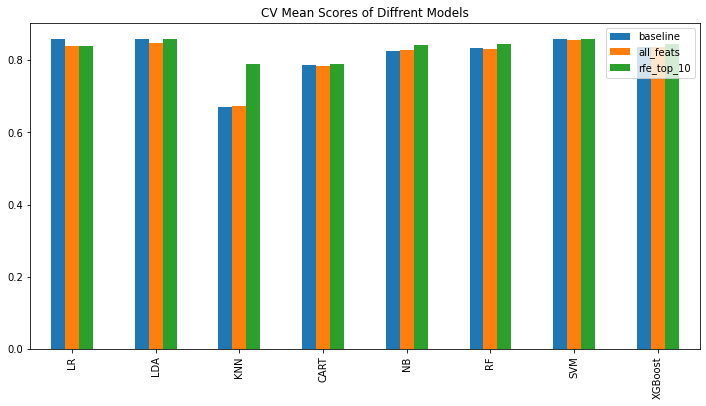

In [239]:
results.plot(y=["baseline", "all_feats", "rfe_top_10"], kind="bar",figsize=(12, 6))
plt.title('CV Mean Scores of Diffrent Models')
plt.show()


- CV Mean scores of diffrent models comparsion of allfeatures,baseline model and top 10 feature

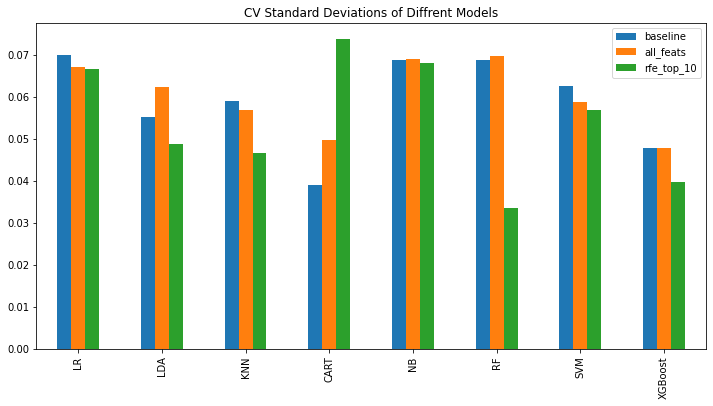

In [240]:
results_std.plot(y=["baseline", "all_feats", "rfe_top_10"], kind="bar",figsize=(12, 6))
plt.title('CV Standard Deviations of Diffrent Models')
plt.show()

- CV StdDev scores of diffrent models comparsion of allfeatures,baseline model and top 10 feature

 - LDA and XGBoost performance is the best among three diffrent test, 
-  but we will hyptetune XGBoost because of the less standard deviation for better model reliability.

### We will Move forward with XGBoost Classifier and find the best hyperparameter using GridSearch CV

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [119]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
    'scale_pos_weight':[10,20,25]
}

In [132]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [133]:
grid_search.fit(X_10, Y_10)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40),
                         'scale_pos_weight': [10, 20, 25]},
             scoring='roc_auc', verbose=True)

In [135]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', ...)

In [136]:
clf= XGBClassifier(learning_rate=0.1,n_estimators=180,max_depth=2,base_score=0.5, booster='gbtree',gamma=0)

In [212]:
clf.fit(Xtrain,Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [213]:
y_pred=clf.predict(Xtest)

In [214]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



#### precision of 0.86 means >>> out of 100 predictions, 86 predictions are correct

#### recall rate of 0.88 means >>> if there are 100 occurences of "1", the model is able to identify/recall 88/100 of them!!

In [215]:
confusion_matrix(Ytest, y_pred)

array([[29,  6],
       [ 5, 36]], dtype=int64)

In [216]:
print('Train Accuracy ',clf.score(Xtrain, Ytrain)*100)
print('Test Accuracy ',clf.score(Xtest, Ytest)*100)

Train Accuracy  94.27312775330397
Test Accuracy  85.52631578947368


In [225]:
clf.score(Xtest, Ytest)

0.8552631578947368

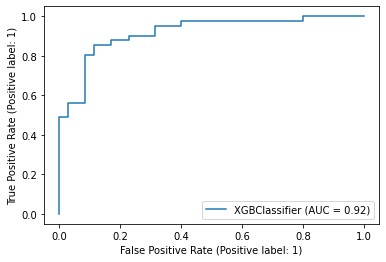

In [218]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, Xtest, Ytest) 

In [219]:
prob_pred = clf.predict_proba(X_10)[:,1]

In [220]:
df['Predicted Probability']=prob_pred
df['Predicted target']=clf.predict(X_10)

In [221]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target,oldpeak_boxcox,Predicted Probability,Predicted target
0,63,1,3,145,233,1,0,150,0,0,0,1,1,0.897845,0.104152,0
1,37,1,2,130,250,0,1,187,0,0,0,2,1,1.055476,0.089495,0
2,41,0,1,130,204,0,0,172,0,2,0,2,1,0.708296,0.684253,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1,0.508937,0.684253,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1,0.418628,0.602123,1
